<a href="https://colab.research.google.com/github/shinnew9/Apziva_practice_code/blob/main/Project4--MonReader/1stphase_2nd_TransferLearning_EfficientNet%2CResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installing Necessary Packages

In [ ]:
!pip install ace_tools --quiet
!pip install easyocr --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
!pip install gTTS --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44283 sha256=bab12ff1fe48badf6ca23337935d411a82b6d412320a759f30ef2113e670f5b8
  Stored in directory: /root/.cache/pip/wheels/bc/52/78/893c3b94279ef238f43a9e89608af648de401b96415bebbd1f
Successfully built grad-cam


In [ ]:
import os
import glob
import pandas as pd

from torch.utils.data import Dataset, DataLoader  # Import Dataset and DataLoader
from torchvision import transforms
from PIL import Image

### Open data

In [ ]:
extract_dir = "/content/drive/MyDrive/Apziva/4th_MonReader/monreader_images"

# Check directory structure after extraction
training_path = os.path.join(extract_dir, "images", "training")
test_path = os.path.join(extract_dir, "images", "testing")

# Checking the number of photos
# Use glob.glob instead of glob
training_images = glob.glob(os.path.join(training_path, "**", "*.jpg"), recursive=True)
test_images = glob.glob(os.path.join(test_path, "**", "*.jpg"), recursive=True)

print(f"🖼️ Training images found: {len(training_images)}")
print(f"🖼️ Testing images found: {len(test_images)}")

🖼️ Training images found: 2392
🖼️ Testing images found: 597


In [ ]:
def get_label_from_path(path):
    return "flip" if "/flip/" in path else "notflip"

df_train = pd.DataFrame({
    "filepath": training_images,
    "label": [get_label_from_path(p) for p in training_images]
})

df_test = pd.DataFrame({
    "filepath": test_images,
    "label": [get_label_from_path(p) for p in test_images]
})

df_train.head()

,filepath,label
0,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip
1,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip
2,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip
3,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip
4,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip


In [ ]:
df_test.head()

,filepath,label
0,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip
1,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip
2,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip
3,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip
4,/content/drive/MyDrive/Apziva/4th_MonReader/mo...,flip


In [ ]:
# Image size and transform, Augmentting Images
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.ToTensor(),
])

In [ ]:
class FlipDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.label_map = {"flip": 1, "notflip": 0}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "filepath"]
        label = self.label_map[self.df.loc[idx, "label"]]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label


train_dataset = FlipDataset(df_train, transform=transform)
test_dataset = FlipDataset(df_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### Showing sample/random images

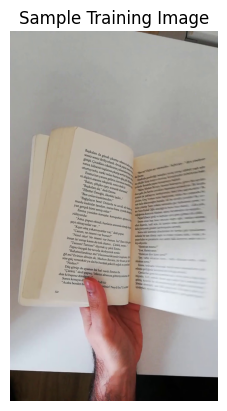

In [ ]:
# sample image
from PIL import Image
import matplotlib.pyplot as plt

if training_images:
  img = Image.open(training_images[0])
  plt.imshow(img)
  plt.title("Sample Training Image")
  plt.axis("off")
  plt.show()
else:
  print("⚠️ No training images found.")

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_random_images(label, df=df_train, num=5):
  subset = df[df["label"]==label].sample(n=num, random_state=42)
  plt.figure(figsize=(15, 3))
  for i, path in enumerate(subset["filepath"]):
    img = Image.open(path).convert("RGB")
    plt.subplot(1, num, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
  plt.tight_layout()
  plt.show()

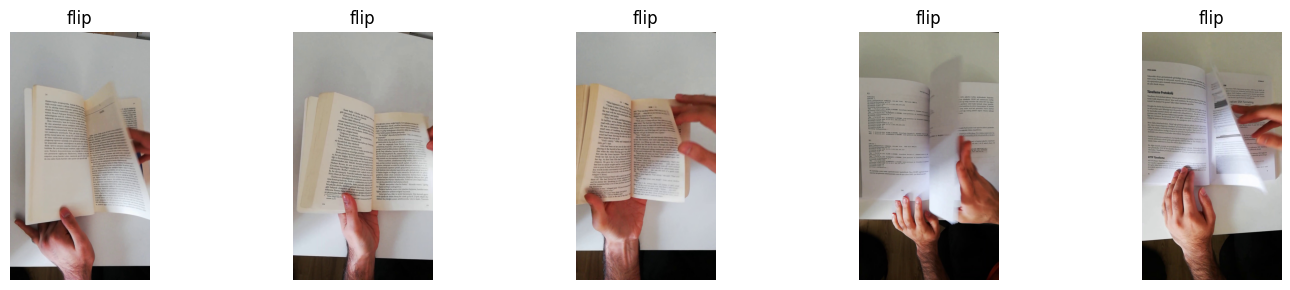

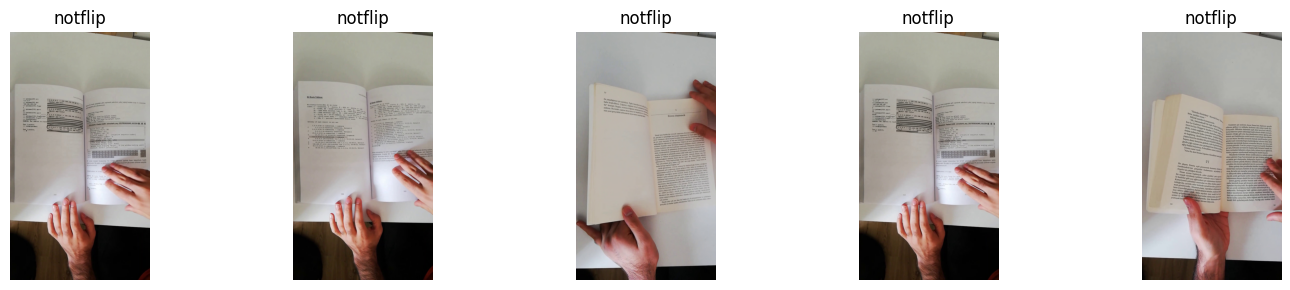

In [ ]:
show_random_images("flip")
show_random_images("notflip")

#### Checking transformation - data augmented

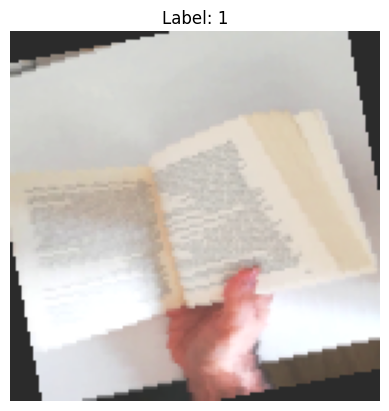

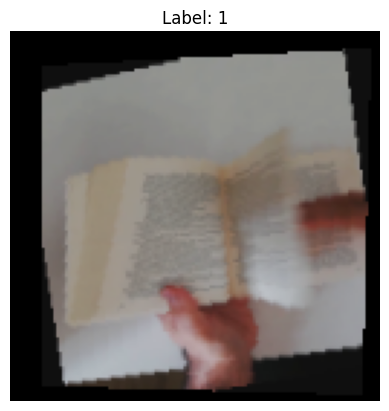

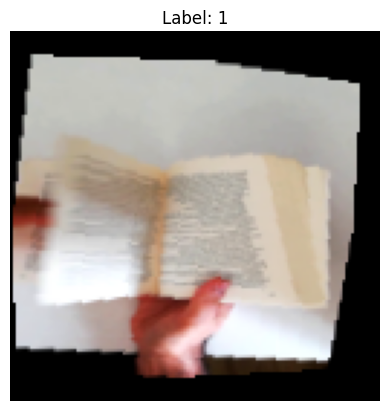

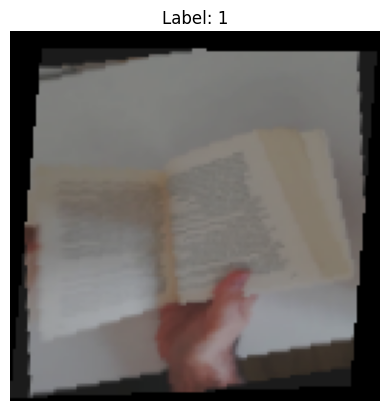

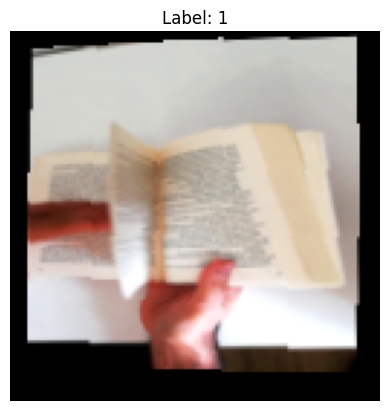

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

for i in range(5):
  img, label = train_dataset[i]
  plt.imshow(F.to_pil_image(img))
  plt.title(f"Label: {label}")
  plt.axis("off")
  plt.show()

#### Checking any overlapped Train/Test images

In [ ]:
overlap = set(df_train["filepath"]) & set(df_test["filepath"])
print(f"🔍 Number of Overlapped Train/Test Images: {len(overlap)}")

🔍 Number of Overlapped Train/Test Images: 0


#### Validation dataset split

In [ ]:
from sklearn.model_selection import train_test_split

df_train_split, df_val = train_test_split(df_train, test_size=0.2, stratify=df_train["label"], random_state=42)

# Applying Transform
train_dataset = FlipDataset(df_train_split, transform=transform)
val_dataset = FlipDataset(df_val, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [ ]:
print(df_train["label"].value_counts())

### Transfer Learning - EfficientNet, ResNet

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# EfficientNet_b0
# I choose b0, becase it's the smallest and fastest.
eff_model = models.efficientnet_b0(pretrained=True)
eff_model.classifier[1] = nn.Linear(eff_model.classifier[1].in_features, 2)   # binary classification
eff_model = eff_model.to(device)

# ResNet50
# I choose 50 - a mid level of the model
resnet_model = models.resnet50(pretrained=True)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 2)
resnet_model = resnet_model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 122MB/s] 
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weight

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer_eff = optim.Adam(eff_model.parameters(), lr = 1e-4)
optimizer_res = optim.Adam(resnet_model.parameters(), lr=1e-4)

In [ ]:
import matplotlib.pyplot as plt


def train_model(model, optimizer, train_loader, val_loader, num_epochs, patience):
  best_loss = float('inf')
  patience_counter = 0
  model = model.to(device)

  # List for saving log

  train_losses = []
  val_losses = []
  train_accuracies = []


  for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0


    for images, labels in train_loader:
      # I need to incorporate early stopping here, during the training, put the if block for every epochs
      # 200 images/ 500 updates, evaluate the model on the validation set, the loos on the validation set drops , align togehter it's fine
      # but if some point, the validation loss climbing up or accuracy drop,s if that happens, stop training, which is early stopiing
      # very commonly used to prevent overfitting
      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    train_acc = correct / total
    avg_train_loss = running_loss / len(train_loader)

    # 🔍 Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
      for val_images, val_labels in val_loader:
        val_iamges, val_labels = val_images.to(device), val_labels.to(device)
        val_outputs = model(val_images)
        v_loss = criterion(val_outputs, val_labels)
        val_loss += v_loss.item()

    avg_val_loss = val_loss / len(val_loader)

    # Saving Log
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {avg_train_loss:.4f} Acc: {train_acc:.4f}| Val Loss: {avg_val_loss:.4f}")


    # Early Stopping
    if avg_val_loss < best_loss:
      best_loss = avg_val_loss
      patience_counter = 0
      best_model_wts = model.state_dict()
    else:
      patience_counter += 1
      if patience_counter >= patience:
        print(f"🛑 Early stopping triggered at epoch {epoch+1}")
        model.load_state_dict(best_model_wts)
        break

  # 📈 Visualization
  epochs = range(1, len(train_losses)+1)

  plt.figure(figsize=(12, 5))

  # Loss Graph
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_losses, label='Train Loss')
  plt.plot(epochs, val_losses, label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss Over Epochs')
  plt.legend()



  # Accuracy Graph
  plt.plot(epochs, train_accuracies, label='Train Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Train Accuracy Over Epochs')
  plt.legend()

  plt.tight_layout()
  plt.show()

  return model

#### EfficientNet-Train

Training EfficientNet...
Epoch [1/20] Train Loss: 0.5697 Acc: 0.7041| Val Loss: 0.3462
Epoch [2/20] Train Loss: 0.2696 Acc: 0.9028| Val Loss: 0.1189
Epoch [3/20] Train Loss: 0.1406 Acc: 0.9498| Val Loss: 0.0734
Epoch [4/20] Train Loss: 0.0832 Acc: 0.9718| Val Loss: 0.0332
Epoch [5/20] Train Loss: 0.0666 Acc: 0.9749| Val Loss: 0.0371
Epoch [6/20] Train Loss: 0.0608 Acc: 0.9775| Val Loss: 0.0169
Epoch [7/20] Train Loss: 0.0668 Acc: 0.9786| Val Loss: 0.0235
Epoch [8/20] Train Loss: 0.0389 Acc: 0.9869| Val Loss: 0.0254
Epoch [9/20] Train Loss: 0.0331 Acc: 0.9890| Val Loss: 0.0127
Epoch [10/20] Train Loss: 0.0197 Acc: 0.9953| Val Loss: 0.0081
Epoch [11/20] Train Loss: 0.0216 Acc: 0.9942| Val Loss: 0.0165
Epoch [12/20] Train Loss: 0.0158 Acc: 0.9953| Val Loss: 0.0169
Epoch [13/20] Train Loss: 0.0148 Acc: 0.9969| Val Loss: 0.0131
🛑 Early stopping triggered at epoch 13


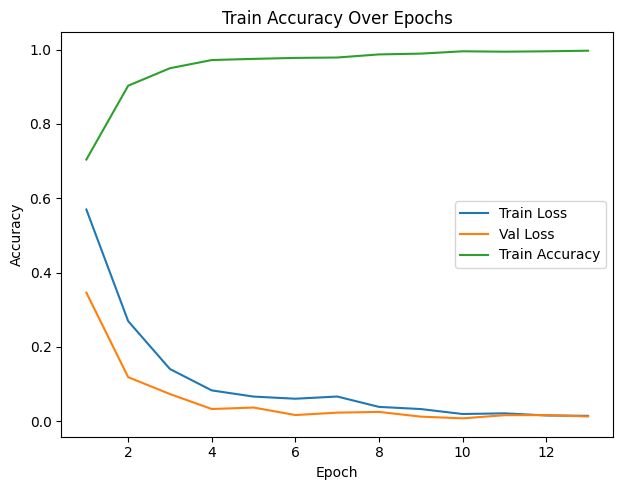

✅ EfficientNet model saved at: /content/drive/MyDrive/Apziva/4th_MonReader/efficient_flip_classifier.pt


In [ ]:
print("Training EfficientNet...")
trained_eff_model = train_model(eff_model, optimizer_eff, train_loader, val_loader, num_epochs=20, patience=3)

# Saving EfficientNet model as checkpoint
save_path_eff = "/content/drive/MyDrive/Apziva/4th_MonReader/efficient_flip_classifier.pt"
torch.save(trained_eff_model.state_dict(), save_path_eff)
print(f"✅ EfficientNet model saved at: {save_path_eff}")

🔍Summary Interpretation <br>

|Item|Meaning|
|:---|:------|
|Train Loss is low|The model is learning well on the training data.|
|TrainAccuracy ~0.99|The model is almost perfectly fitting the training set (similar to before).|
|Validation Loss is also low|Indicate the model is generalizing well (not overfitting).|
|Val Loss shows small fluctuations|👍This is normal - some ups and downs are expected in real-world training|
|Spike at epoch 3|Temporary instability, but it recovers - which is actually a healty training signal.|

<br>
📊 Graph Interpretation <br>
*  Green line (Train Accuracy): consistently high -> good sign <br>
*  Orange line (Val Loss): spiked at epoch 3 but quickly stabilized <br>
*  Blue line (Train Loss): steadily decreasing <br>
-> This overall indicates a **healthy and stable training process**, much more reliable than the previous overfit-like behavior.

#### ResNet-Train

Training ResNet...
Epoch [1/20] Train Loss: 0.3067 Acc: 0.8573| Val Loss: 0.0876
Epoch [2/20] Train Loss: 0.1355 Acc: 0.9462| Val Loss: 0.0497
Epoch [3/20] Train Loss: 0.0682 Acc: 0.9796| Val Loss: 0.0218
Epoch [4/20] Train Loss: 0.0423 Acc: 0.9885| Val Loss: 0.0354
Epoch [5/20] Train Loss: 0.0367 Acc: 0.9906| Val Loss: 0.0321
Epoch [6/20] Train Loss: 0.0355 Acc: 0.9869| Val Loss: 0.0117
Epoch [7/20] Train Loss: 0.0211 Acc: 0.9932| Val Loss: 0.0173
Epoch [8/20] Train Loss: 0.0227 Acc: 0.9953| Val Loss: 0.0103
Epoch [9/20] Train Loss: 0.0184 Acc: 0.9922| Val Loss: 0.0150
Epoch [10/20] Train Loss: 0.0113 Acc: 0.9953| Val Loss: 0.0381
Epoch [11/20] Train Loss: 0.0272 Acc: 0.9901| Val Loss: 0.0050
Epoch [12/20] Train Loss: 0.0135 Acc: 0.9953| Val Loss: 0.0500
Epoch [13/20] Train Loss: 0.0149 Acc: 0.9963| Val Loss: 0.0179
Epoch [14/20] Train Loss: 0.0289 Acc: 0.9895| Val Loss: 0.0105
🛑 Early stopping triggered at epoch 14


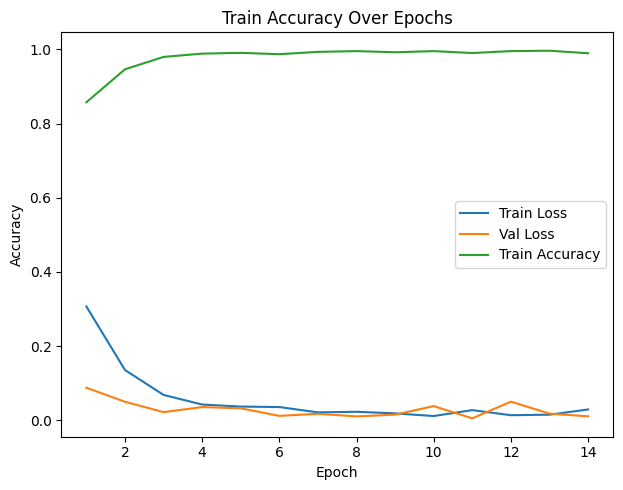

✅ ResNet model saved at: /content/drive/MyDrive/Apziva/4th_MonReader/resnet_flip_classifier.pt


In [ ]:
print("Training ResNet...")
trained_resnet_model = train_model(resnet_model,  # model
                                   optimizer_res, # Optimizer
                                   train_loader,  # Loading the training data
                                   val_loader,    # Loading the validation dataset
                                   num_epochs=20, # Number of Epochs
                                   patience=3)     # Early stopping patience

# transfer leraning is about training the model for certain dataset, modify the architectures, add some layers for the classification purposes, and finetune to the
# utilize the previosuly learned weights, transferring the learning from the imagenet to the customzied tasks
# the model is learned to the task and take the weights and


# Saving ResNet model as checkpoint
save_path_res = "/content/drive/MyDrive/Apziva/4th_MonReader/resnet_flip_classifier.pt"
torch.save(trained_resnet_model.state_dict(), save_path_res)
print(f"✅ ResNet model saved at: {save_path_res}")

🔍 ResNet Training Summary

|Item|Meaning|
|----|-------|
|**Train Loss consistently decreased**|The model steadily learned the training data.|
|**Train Accuracy rose to 0.999**|Near-perfect traning accuracy, indicating strong learning.|
|**Validation Loss gradually decreased**|The model generalizes well to unseen data.|
|**Slight fluctuation around epoch 5-10**|Normal - the model was still improving.|
|**Early stopping at epch 14**|Triggered appropriately - no more improvement on validation loss.|

<br>
Overall, the ResNet model was trained successfully with stable convergence and no overfitting.

#### Evaluating on both Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, data_loader, dataset_name=""):
  model.eval()
  all_preds = []
  all_labels = []

  with torch.no_grad():
    for images, labels in data_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      _, preds = torch.max(outputs, 1)
      all_preds.extend(preds.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  report = classification_report(all_labels, all_preds, target_names=["notflip", "flip"], output_dict=True)
  cm = confusion_matrix(all_labels, all_preds)

  print(f"\n📊 Evaluation on {dataset_name} set:")
  print("Confusion Matrix:")
  print(cm)

  # Printing out F-1Score, Precision, Recall, Accuracy
  print("\n 📌 Metrics (class: flip):")
  print("Precision:", round(report["flip"]["precision"], 4))
  print("Recall   :", round(report["flip"]["recall"], 4))
  print("F-1score :", round(report["flip"]["f1-score"], 4))

  print("\n 📌 Accuracy (overall):")
  print("Accuracy:", round(report["accuracy"], 4))


  sns.heatmap(cm, annot=True, fmt="d", xticklabels=["notflip", "flip"], yticklabels=["notflip", "flip"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"{dataset_name} Set- Confusion Matrix")
  plt.show()

  return report, cm

In [ ]:
# Evaluating EfficientNet
report_eff, cm_eff = evaluate_model(trained_eff_model, test_loader, dataset_name="Test (EfficientNet)")

# Evaluating ResNet
report_res, cm_res = evaluate_model(trained_resnet_model, test_loader, dataset_name="Test (ResNet)")

### Checkpoint recalling and evaluate

In [ ]:
# Model Recalling
# Run Transfer Learning - EfficientNet, ResNet

# EfficientNet_Model Checkpoint Loading
eff_state_dict = torch.load("/content/drive/MyDrive/Apziva/4th_MonReader/efficient_flip_classifier.pt")
eff_model.load_state_dict(eff_state_dict)
loaded_eff_model = eff_model.to(device)
loaded_eff_model.eval()

# ResNet_Model Checkpoint Loading
res_state_dict = torch.load("/content/drive/MyDrive/Apziva/4th_MonReader/resnet_flip_classifier.pt")
resnet_model.load_state_dict(res_state_dict)
loaded_resnet_model = resnet_model.to(device)
loaded_resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 


📊 Evaluation on Test (EfficientNet) set:
Confusion Matrix:
[[307   0]
 [  3 287]]

 📌 Metrics (class: flip):
Precision: 1.0
Recall   : 0.9897
F-1score : 0.9948

 📌 Accuracy (overall):
Accuracy: 0.995


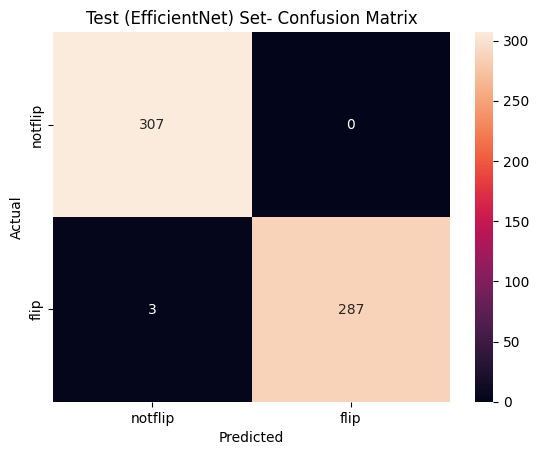


📊 Evaluation on Test (ResNet) set:
Confusion Matrix:
[[307   0]
 [  2 288]]

 📌 Metrics (class: flip):
Precision: 1.0
Recall   : 0.9931
F-1score : 0.9965

 📌 Accuracy (overall):
Accuracy: 0.9966


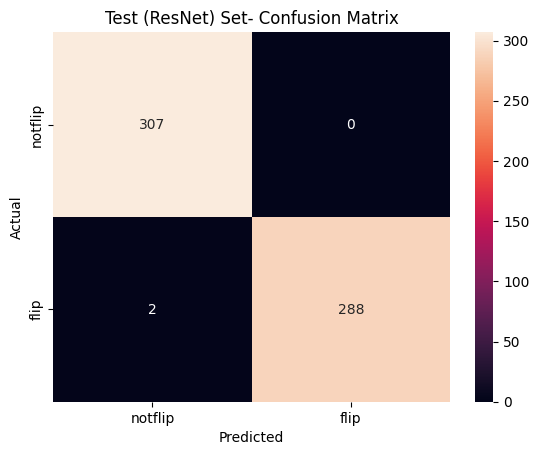

In [ ]:
# Evaluating EfficientNet
# report_eff, cm_eff = evaluate_model(trained_eff_model, test_loader, dataset_name="Test (EfficientNet)")
report_eff, cm_eff = evaluate_model(loaded_eff_model, test_loader, dataset_name="Test (EfficientNet)")

# Evaluating ResNet
# report_res, cm_res = evaluate_model(trained_resnet_model, test_loader, dataset_name="Test (ResNet)")
report_res, cm_res = evaluate_model(loaded_resnet_model, test_loader, dataset_name="Test (ResNet)")

### GradCAM- Visualize to check in which part the model is referring from the each images

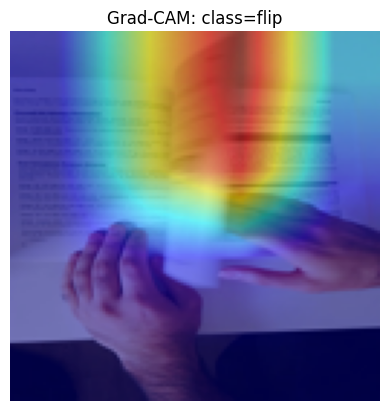

In [ ]:
import numpy as np

from PIL import Image
from torchvision import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image

# EfficientNetB0에서 GradCAM을 적용할 마지막 conv 레이어 이름
target_layer = eff_model.features[-1]

# Grad-CAM 인스턴스
cam = GradCAM(model=eff_model, target_layers=[target_layer])  # use_cuda= True이면

# 테스트 할 이미지 불러오기
img_path = "/content/drive/MyDrive/Apziva/4th_MonReader/monreader_images/images/testing/flip/0001_000000020.jpg"
img = Image.open(img_path).convert("RGB")

# 원본 이미지를 numpy로 변환 (0~1 정규화)
img_resized = img.resize((128, 128))
rgb_img = np.array(img_resized)/255.0


# 모델 입력 형태로 변환 (텐서화)
input_tensor = transform(img).unsqueeze(0)  # (1, 3, 128, 128)

# Grad-CAM 실행
targets = [ClassifierOutputTarget(1)]  # clas index 1 -> "flip"
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0]

# 시각화 이미지 만들기
cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb = True)

# 출력
plt.imshow(cam_image)
plt.title("Grad-CAM: class=flip")
plt.axis("off")
plt.show()